In [304]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 600

In [324]:
pvalue_Mes = pd.read_csv('Mes.csv',index_col=0)
pvalue_Pro = pd.read_csv('Pro.csv',index_col=0)
pvalue_Cla = pd.read_csv('Cla.csv',index_col=0)
pvalue_Neu = pd.read_csv('Neu.csv',index_col=0)
pvalue_subtype = pd.read_csv('subcelltype.csv',index_col=0)
pvalue_Mes_Pro = pd.read_csv('Mes_Pro.csv',index_col=0)

gene_Mes = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Mes.csv', index_col=0)
snv_Mes = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Mes.csv', index_col=0)

gene_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Pro.csv', index_col=0)
snv_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Pro.csv', index_col=0)

gene_Cla = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Cla.csv', index_col=0)
snv_Cla = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Cla.csv', index_col=0)

gene_Neu = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Neu.csv', index_col=0)
snv_Neu = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Neu.csv', index_col=0)

label_all = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_label.csv', index_col=0)

gene_Mes_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Mes_and_Pro.csv', index_col=0)
snv_Mes_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Mes_and_Pro.csv', index_col=0)


In [262]:
label_all.subtype.value_counts()

subtype: Mes    74
subtype: Pro    65
subtype: Cla    41
subtype: Neu    23
Name: subtype, dtype: int64

# Filter out all-non-zero genes

In [282]:
all_nonzero_gene_Mes_Pro = (gene_Mes_Pro > 0).sum(axis = 1)[(gene_Mes_Pro > 0).sum(axis = 1) == gene_Mes_Pro.shape[1]].index.values
all_nonzero_gene_Mes = (gene_Mes > 0).sum(axis = 1)[(gene_Mes > 0).sum(axis = 1) == gene_Mes.shape[1]].index.values
all_nonzero_gene_Pro = (gene_Pro > 0).sum(axis = 1)[(gene_Pro > 0).sum(axis = 1) == gene_Pro.shape[1]].index.values

In [283]:
all_nonzero_gene_Mes_Pro

array(['ENSG00000074800.9', 'ENSG00000143933.12', 'ENSG00000155368.12',
       'ENSG00000075624.9', 'ENSG00000105894.7', 'ENSG00000111640.10',
       'ENSG00000149925.12', 'ENSG00000087460.19'], dtype=object)

In [284]:
all_nonzero_gene_Mes

array(['ENSG00000074800.9', 'ENSG00000143933.12', 'ENSG00000155368.12',
       'ENSG00000168036.12', 'ENSG00000155130.5', 'ENSG00000075624.9',
       'ENSG00000105855.5', 'ENSG00000105894.7', 'ENSG00000164733.16',
       'ENSG00000111640.10', 'ENSG00000149925.12', 'ENSG00000087460.19'],
      dtype=object)

In [285]:
all_nonzero_gene_Pro

array(['ENSG00000074800.9', 'ENSG00000125462.12', 'ENSG00000143933.12',
       'ENSG00000155368.12', 'ENSG00000075624.9', 'ENSG00000091129.15',
       'ENSG00000105894.7', 'ENSG00000111640.10', 'ENSG00000198668.6',
       'ENSG00000149925.12', 'ENSG00000087460.19'], dtype=object)

In [294]:
gene_Mes_Pro_filtered = gene_Mes_Pro.loc[~gene_Mes_Pro.index.isin(all_nonzero_gene_Mes_Pro),]
gene_Mes_filtered = gene_Mes.loc[~gene_Mes.index.isin(all_nonzero_gene_Mes),]
gene_Pro_filtered = gene_Pro.loc[~gene_Pro.index.isin(all_nonzero_gene_Pro),]
pvalue_Mes_Pro_filtered = pvalue_Mes_Pro.loc[~pvalue_Mes_Pro.index.isin(all_nonzero_gene_Mes_Pro),]
pvalue_Mes_filtered = pvalue_Mes.loc[~pvalue_Mes.index.isin(all_nonzero_gene_Mes),]
pvalue_Pro_filtered = pvalue_Pro.loc[~pvalue_Pro.index.isin(all_nonzero_gene_Pro),]

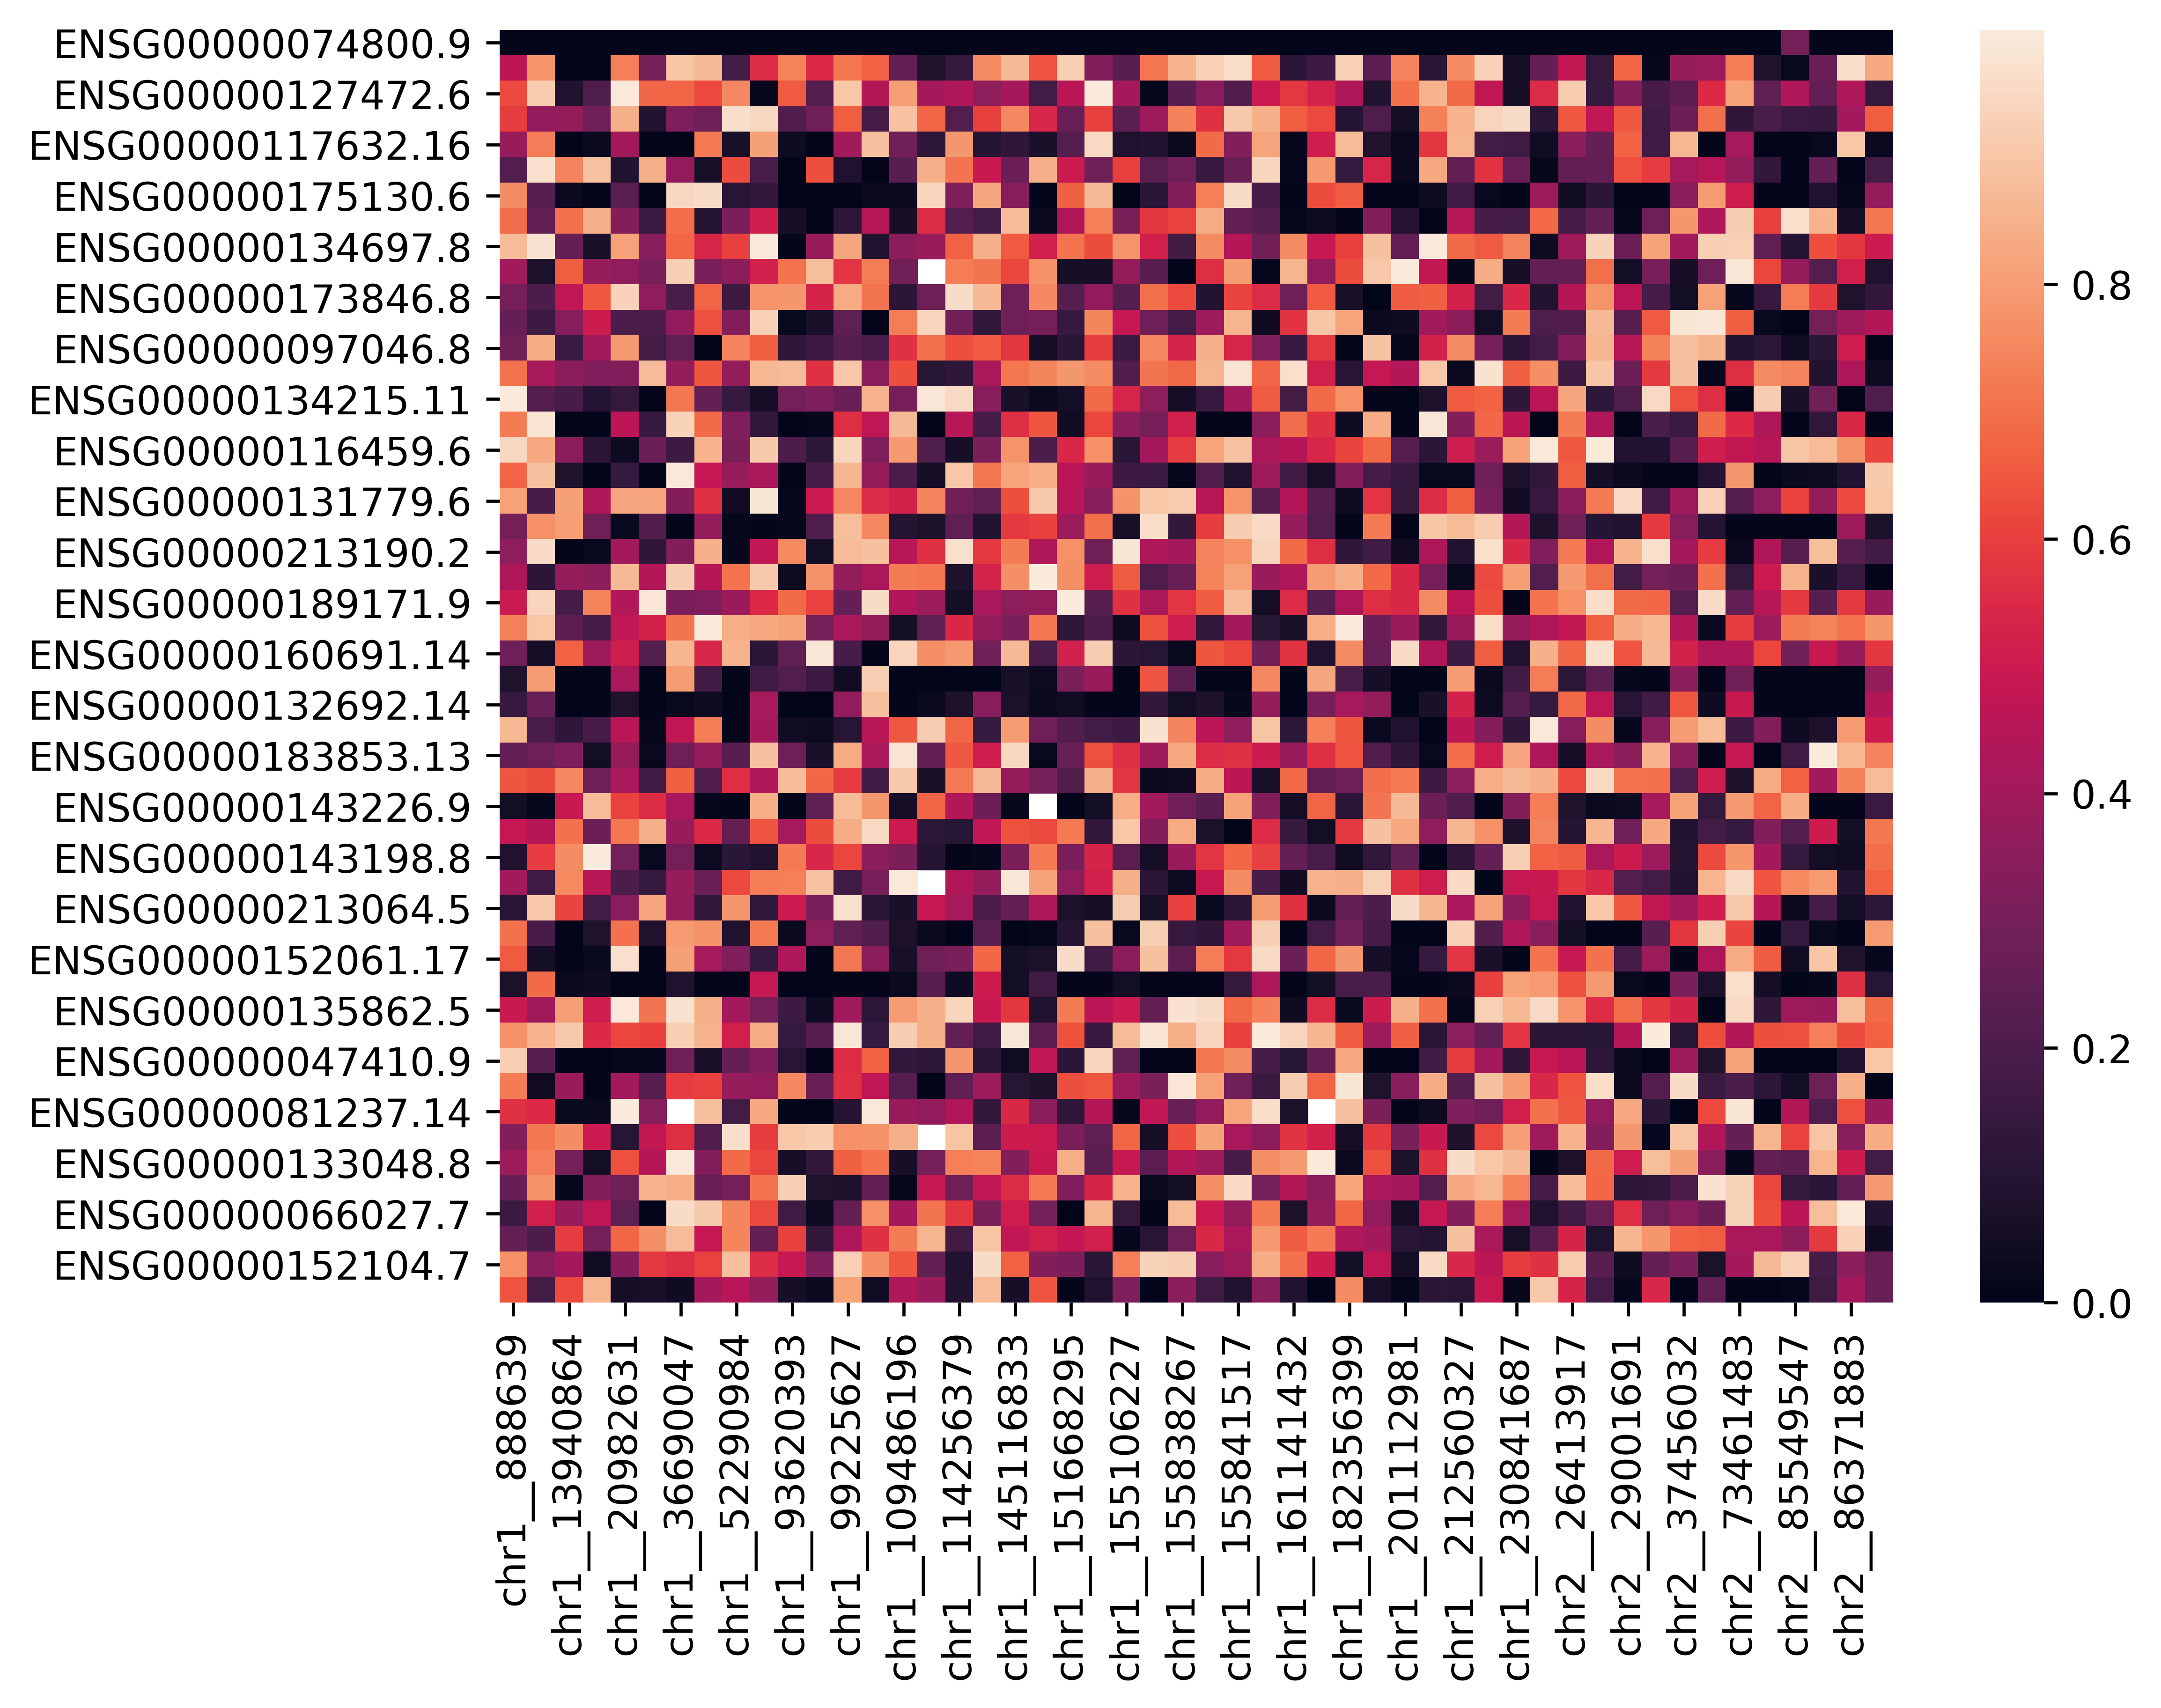

In [311]:
sns.heatmap(pvalue_Mes_Pro.iloc[:50,:50])

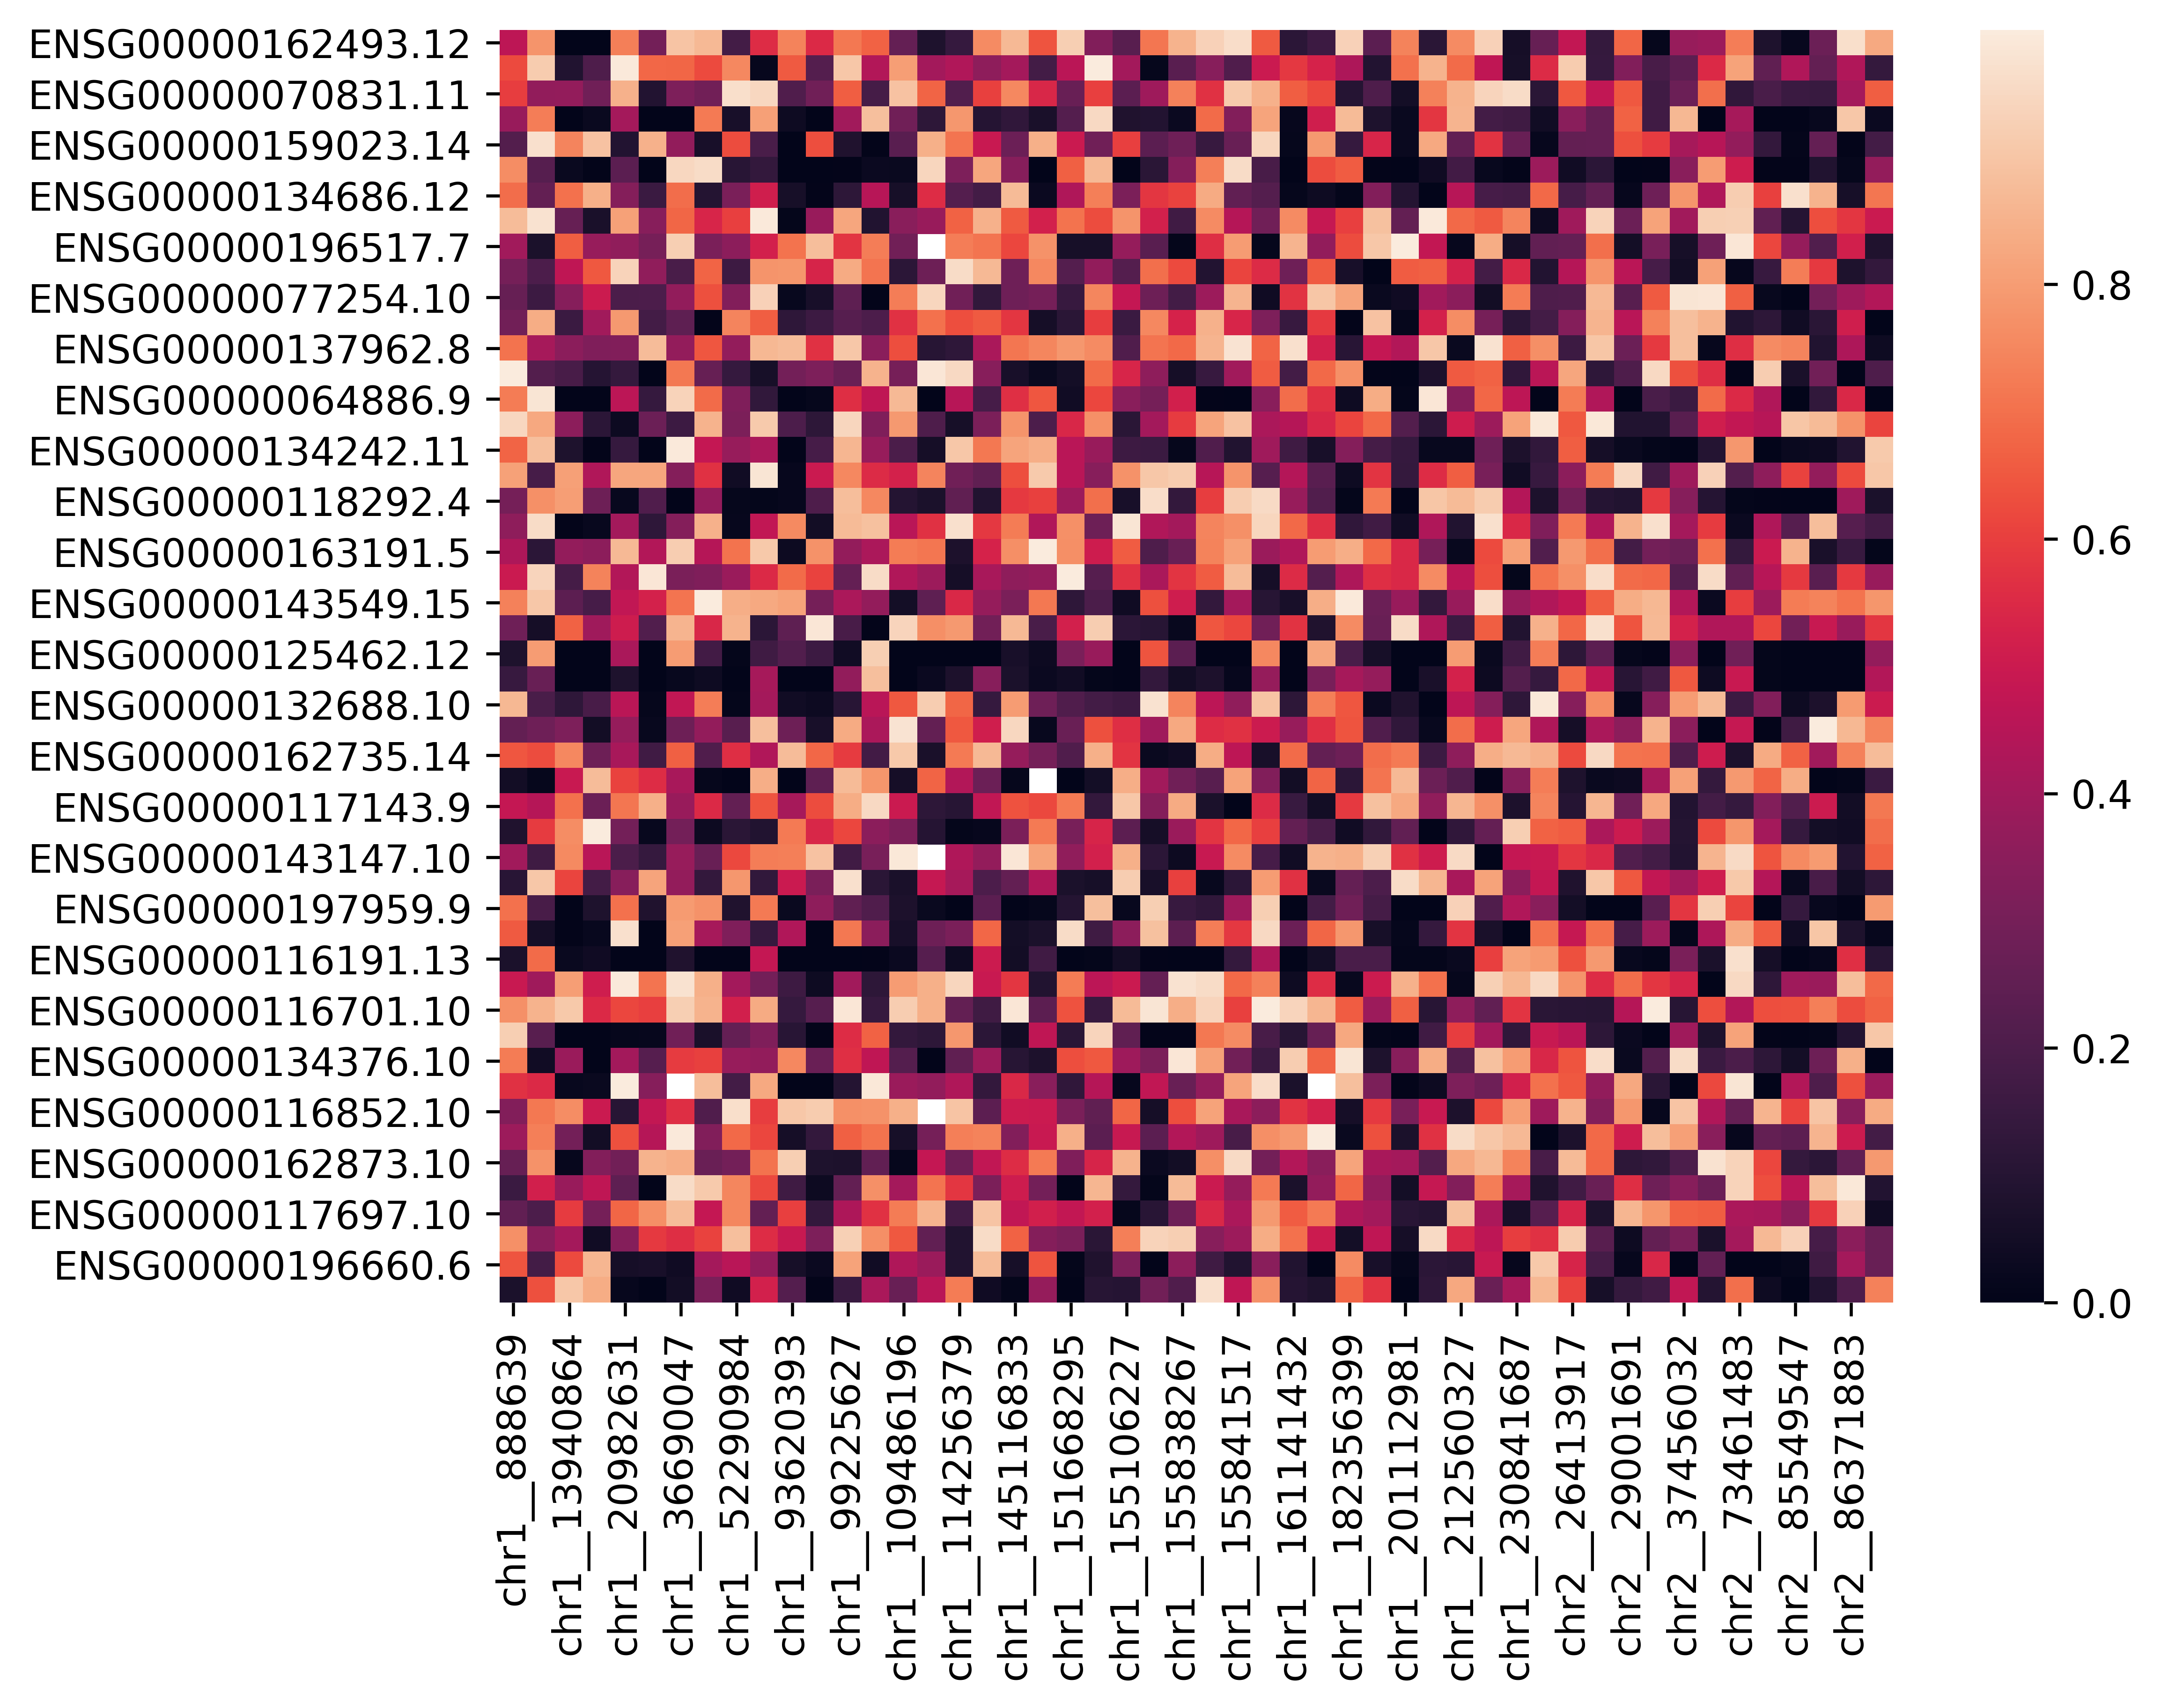

In [312]:
sns.heatmap(pvalue_Mes_Pro_filtered.iloc[:50,:50])

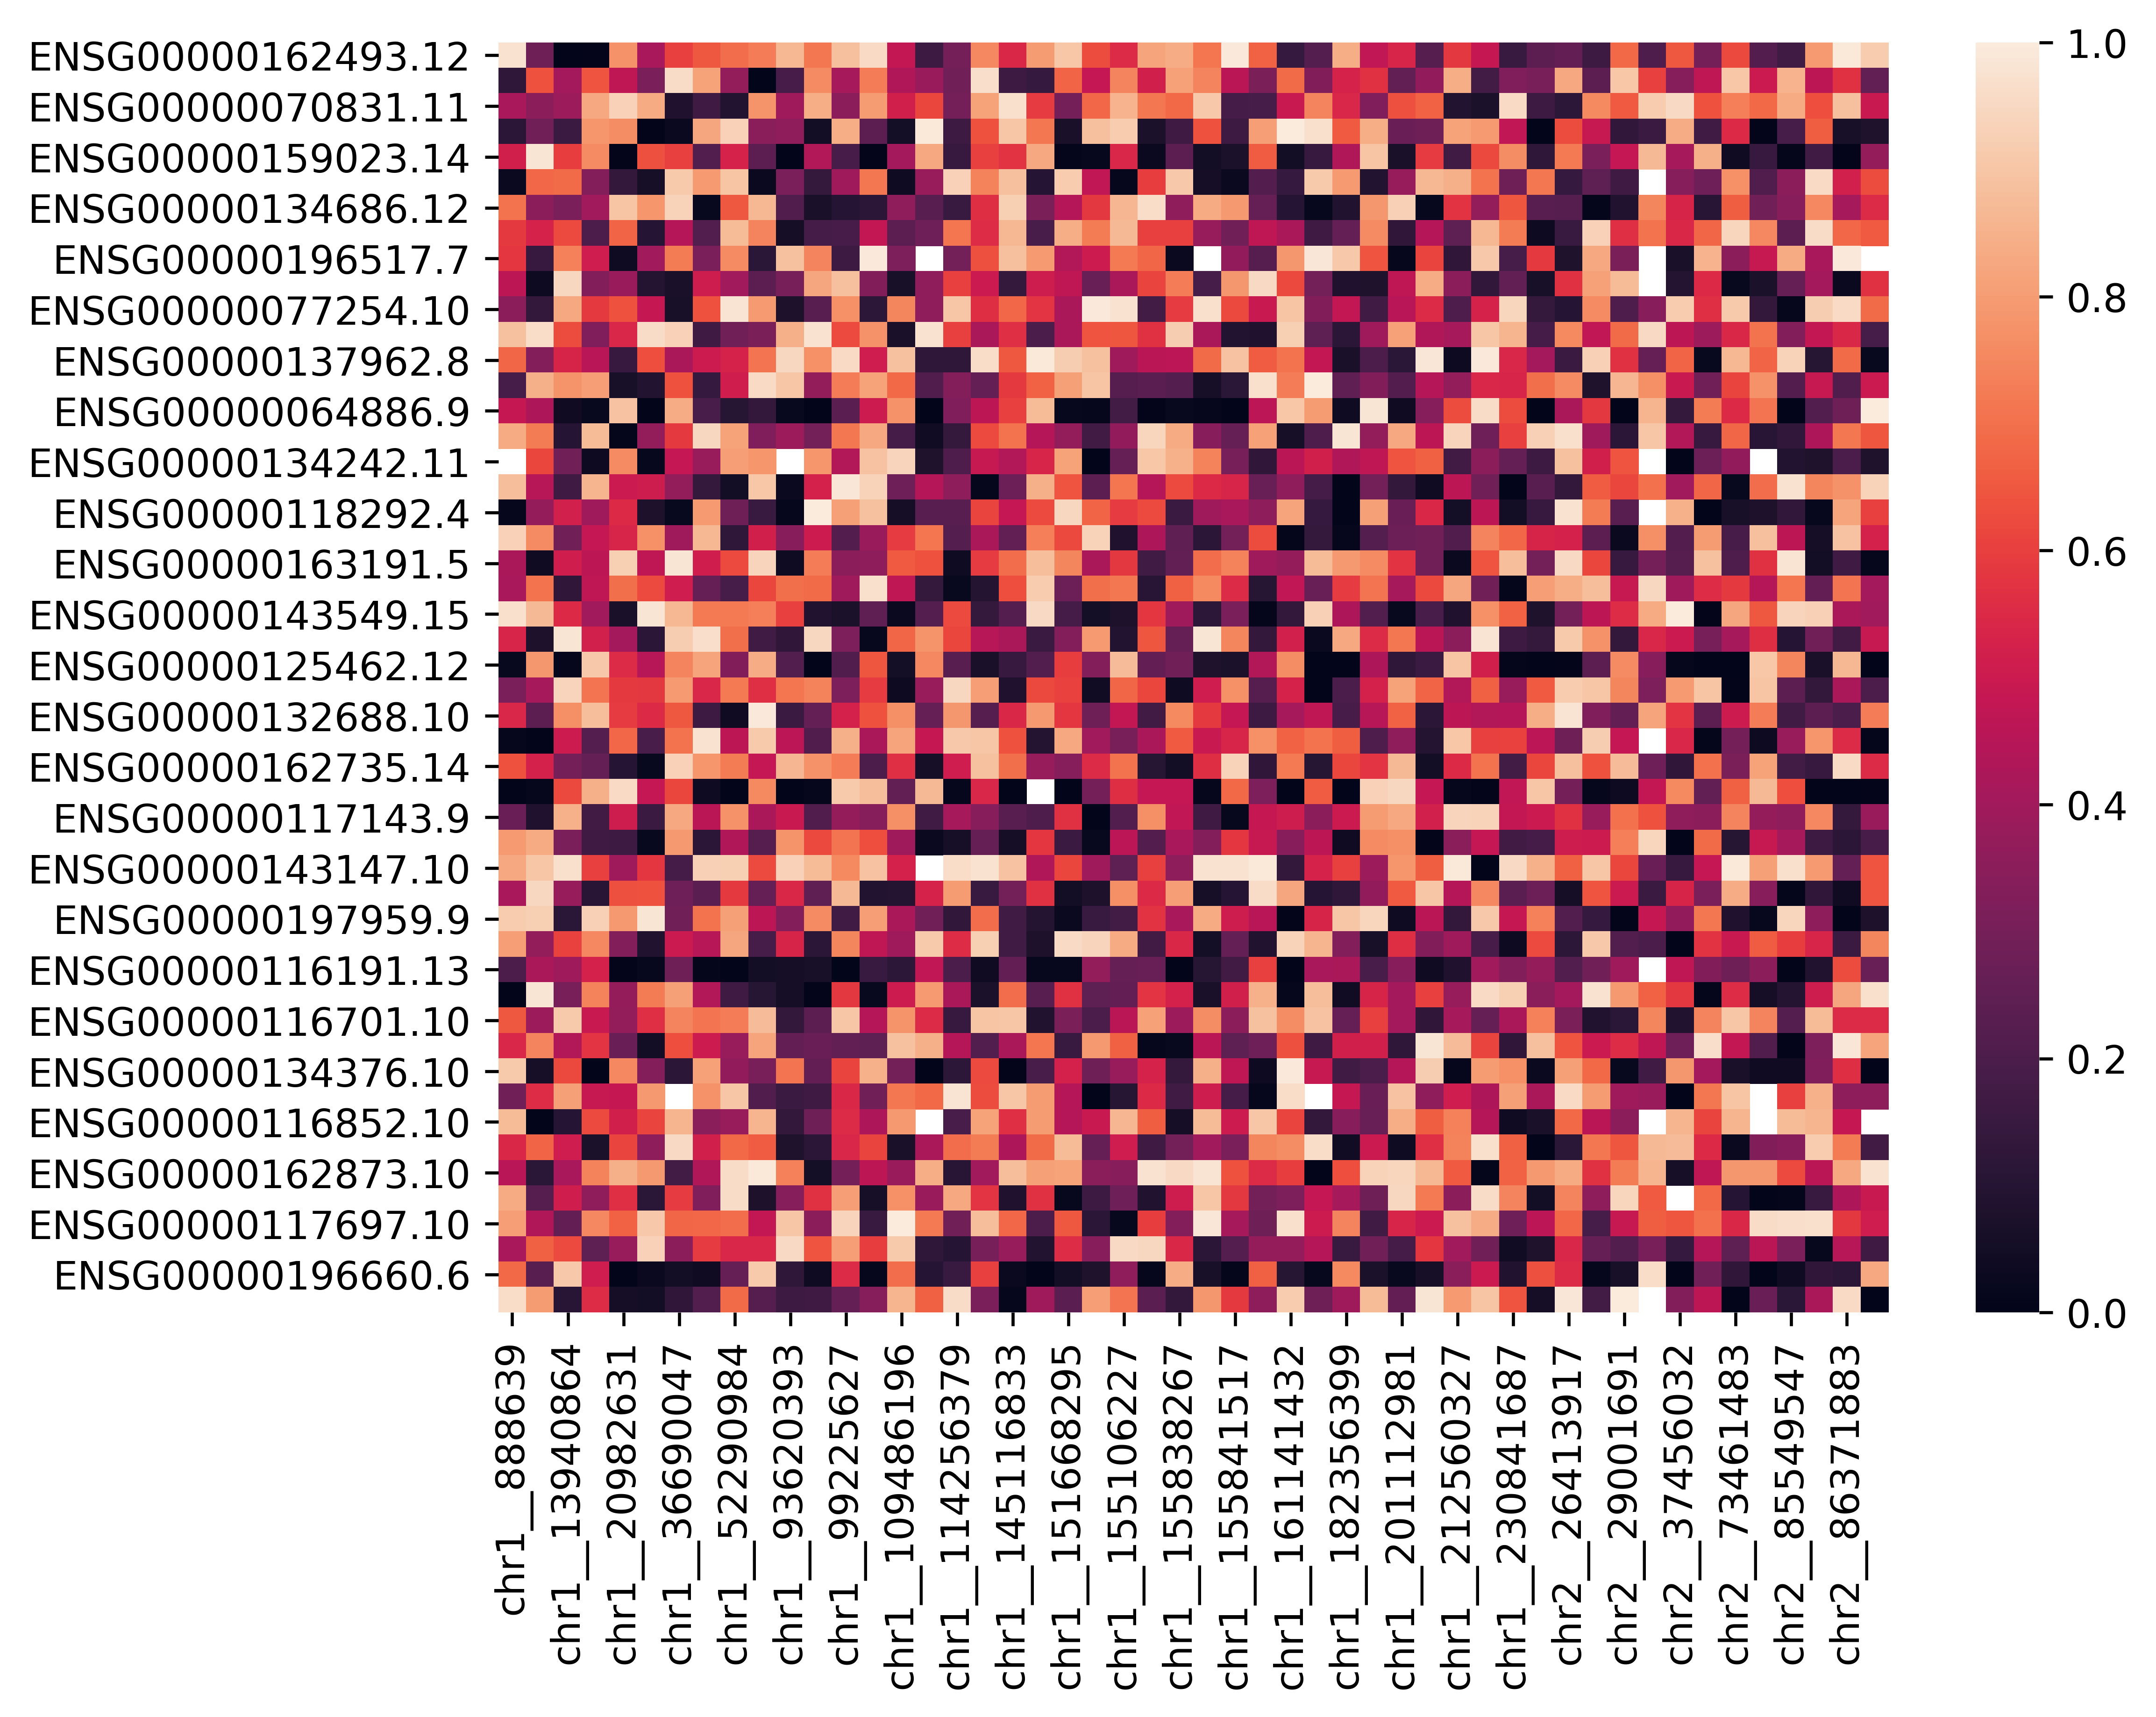

In [313]:
sns.heatmap(pvalue_Mes_filtered.iloc[:50,:50])

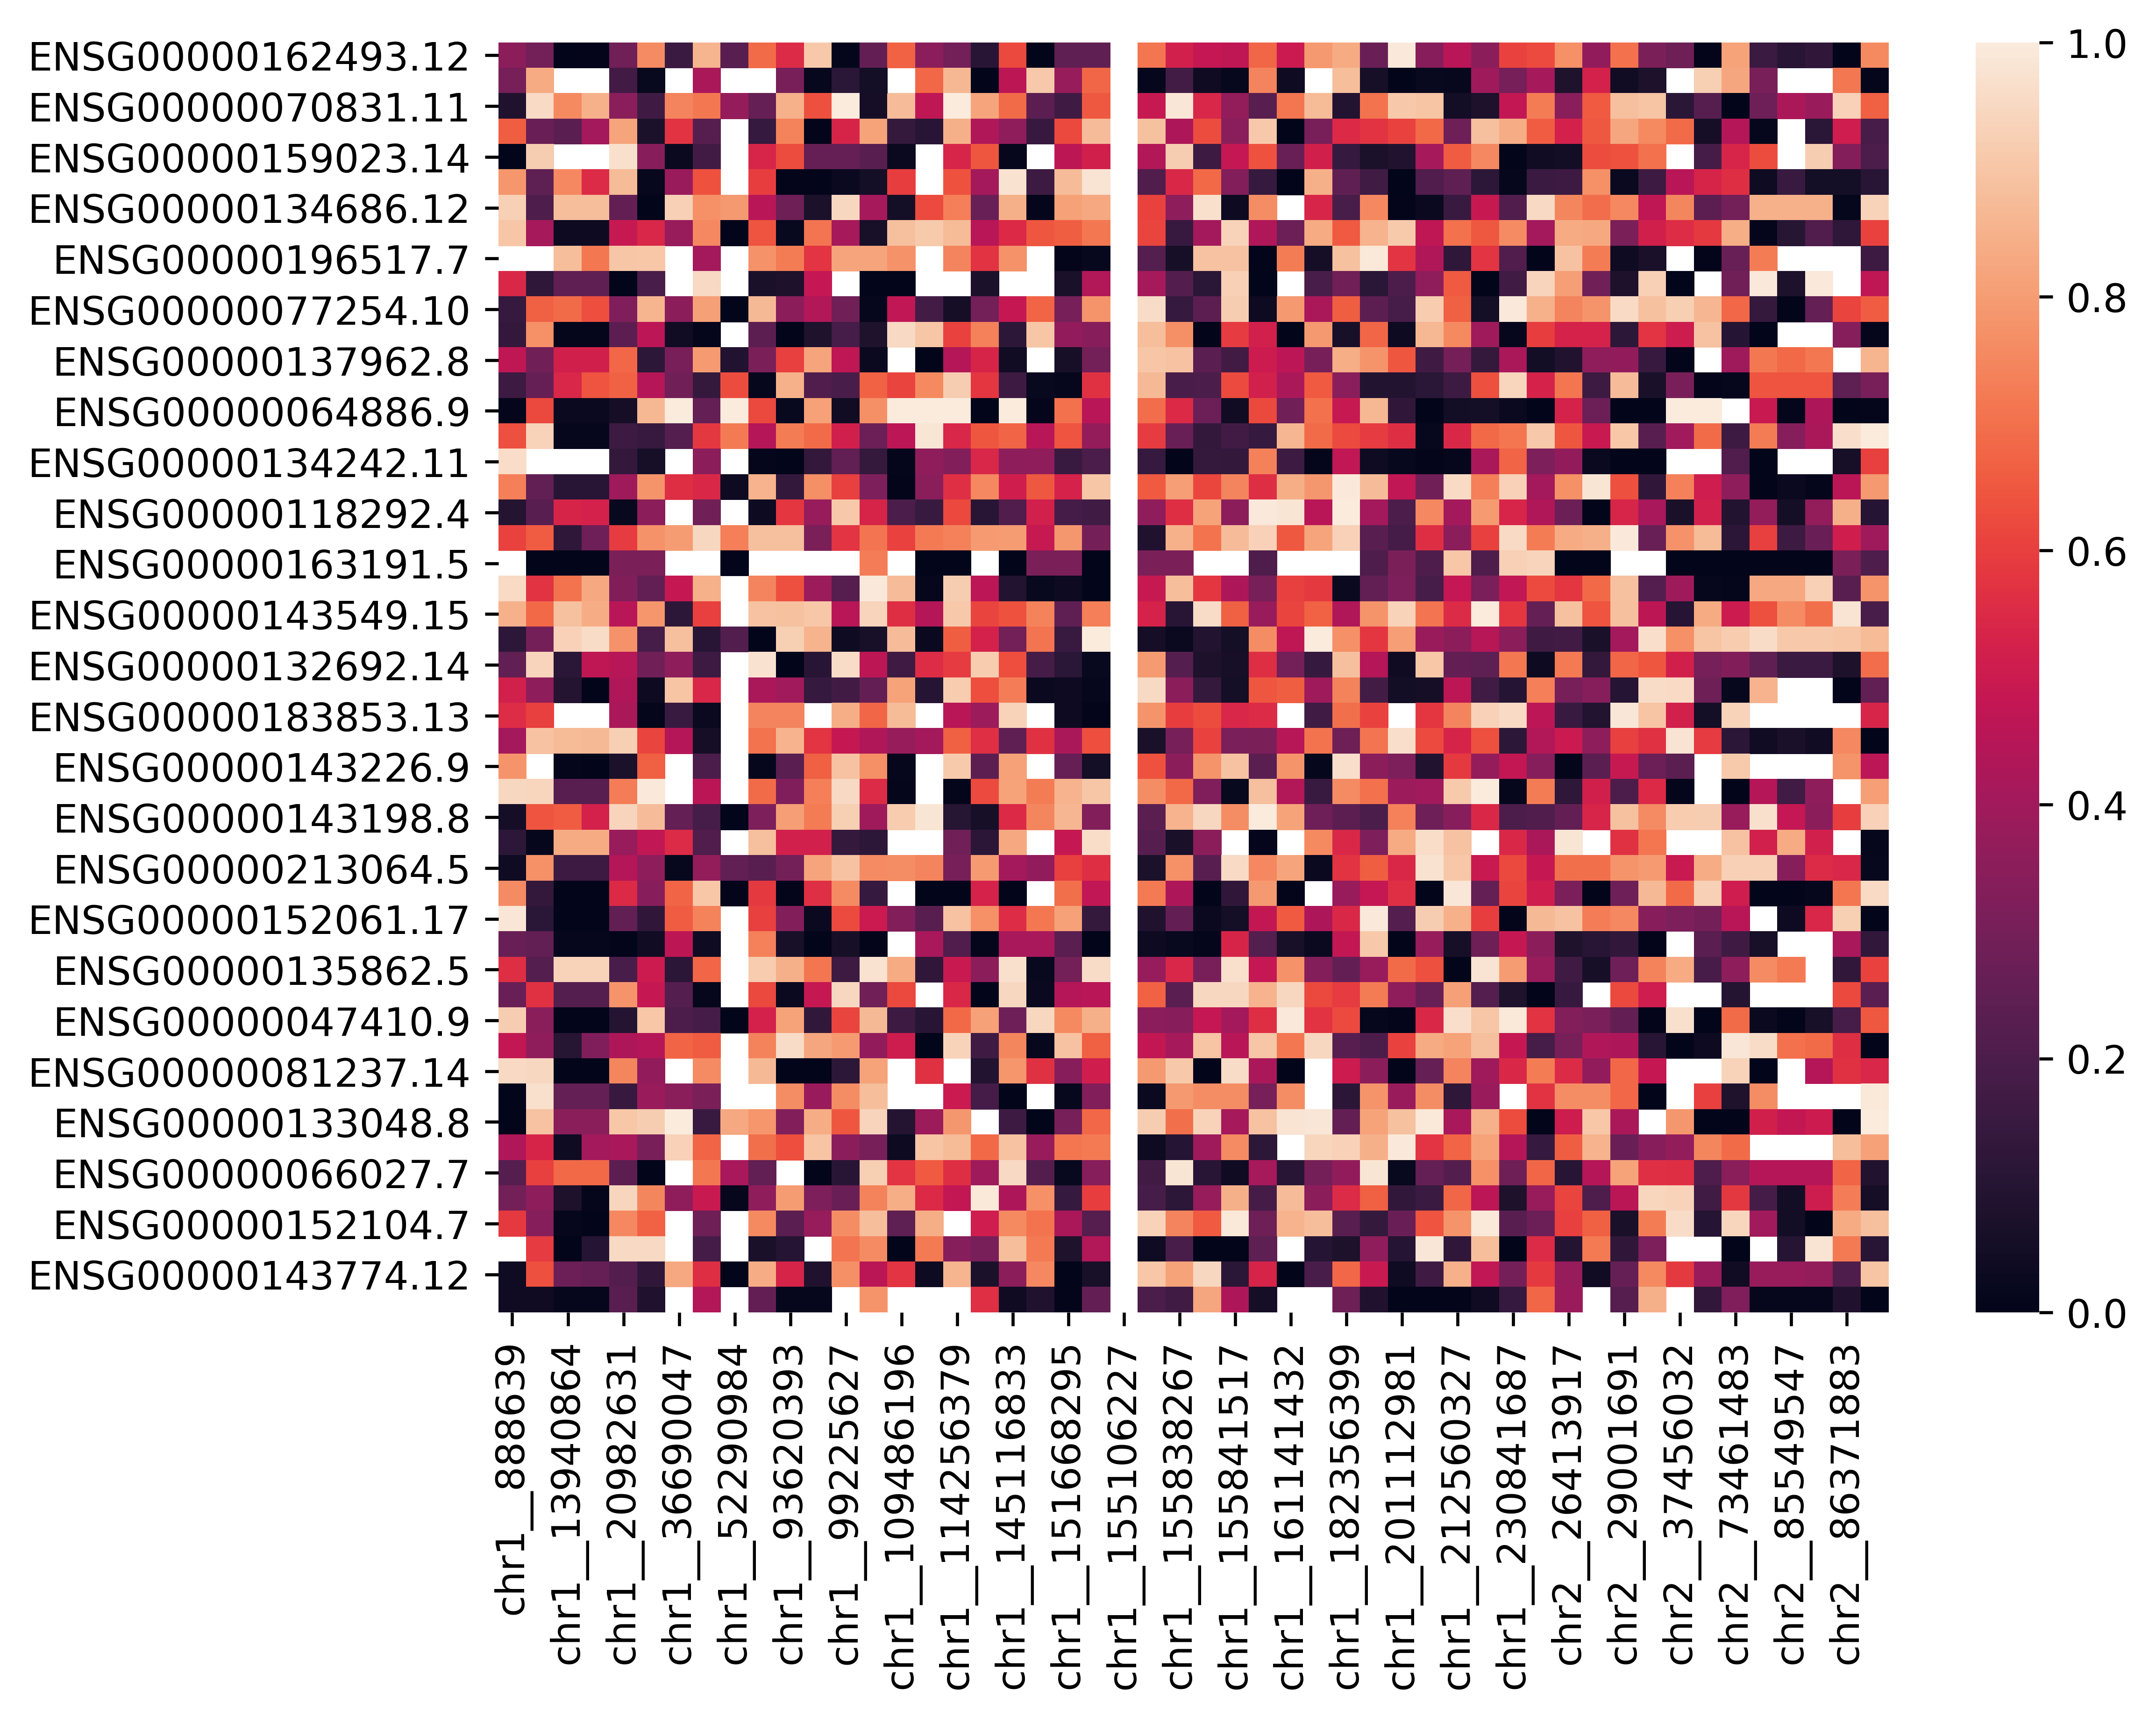

In [314]:
sns.heatmap(pvalue_Pro_filtered.iloc[:50,:50])

# Select SNVs

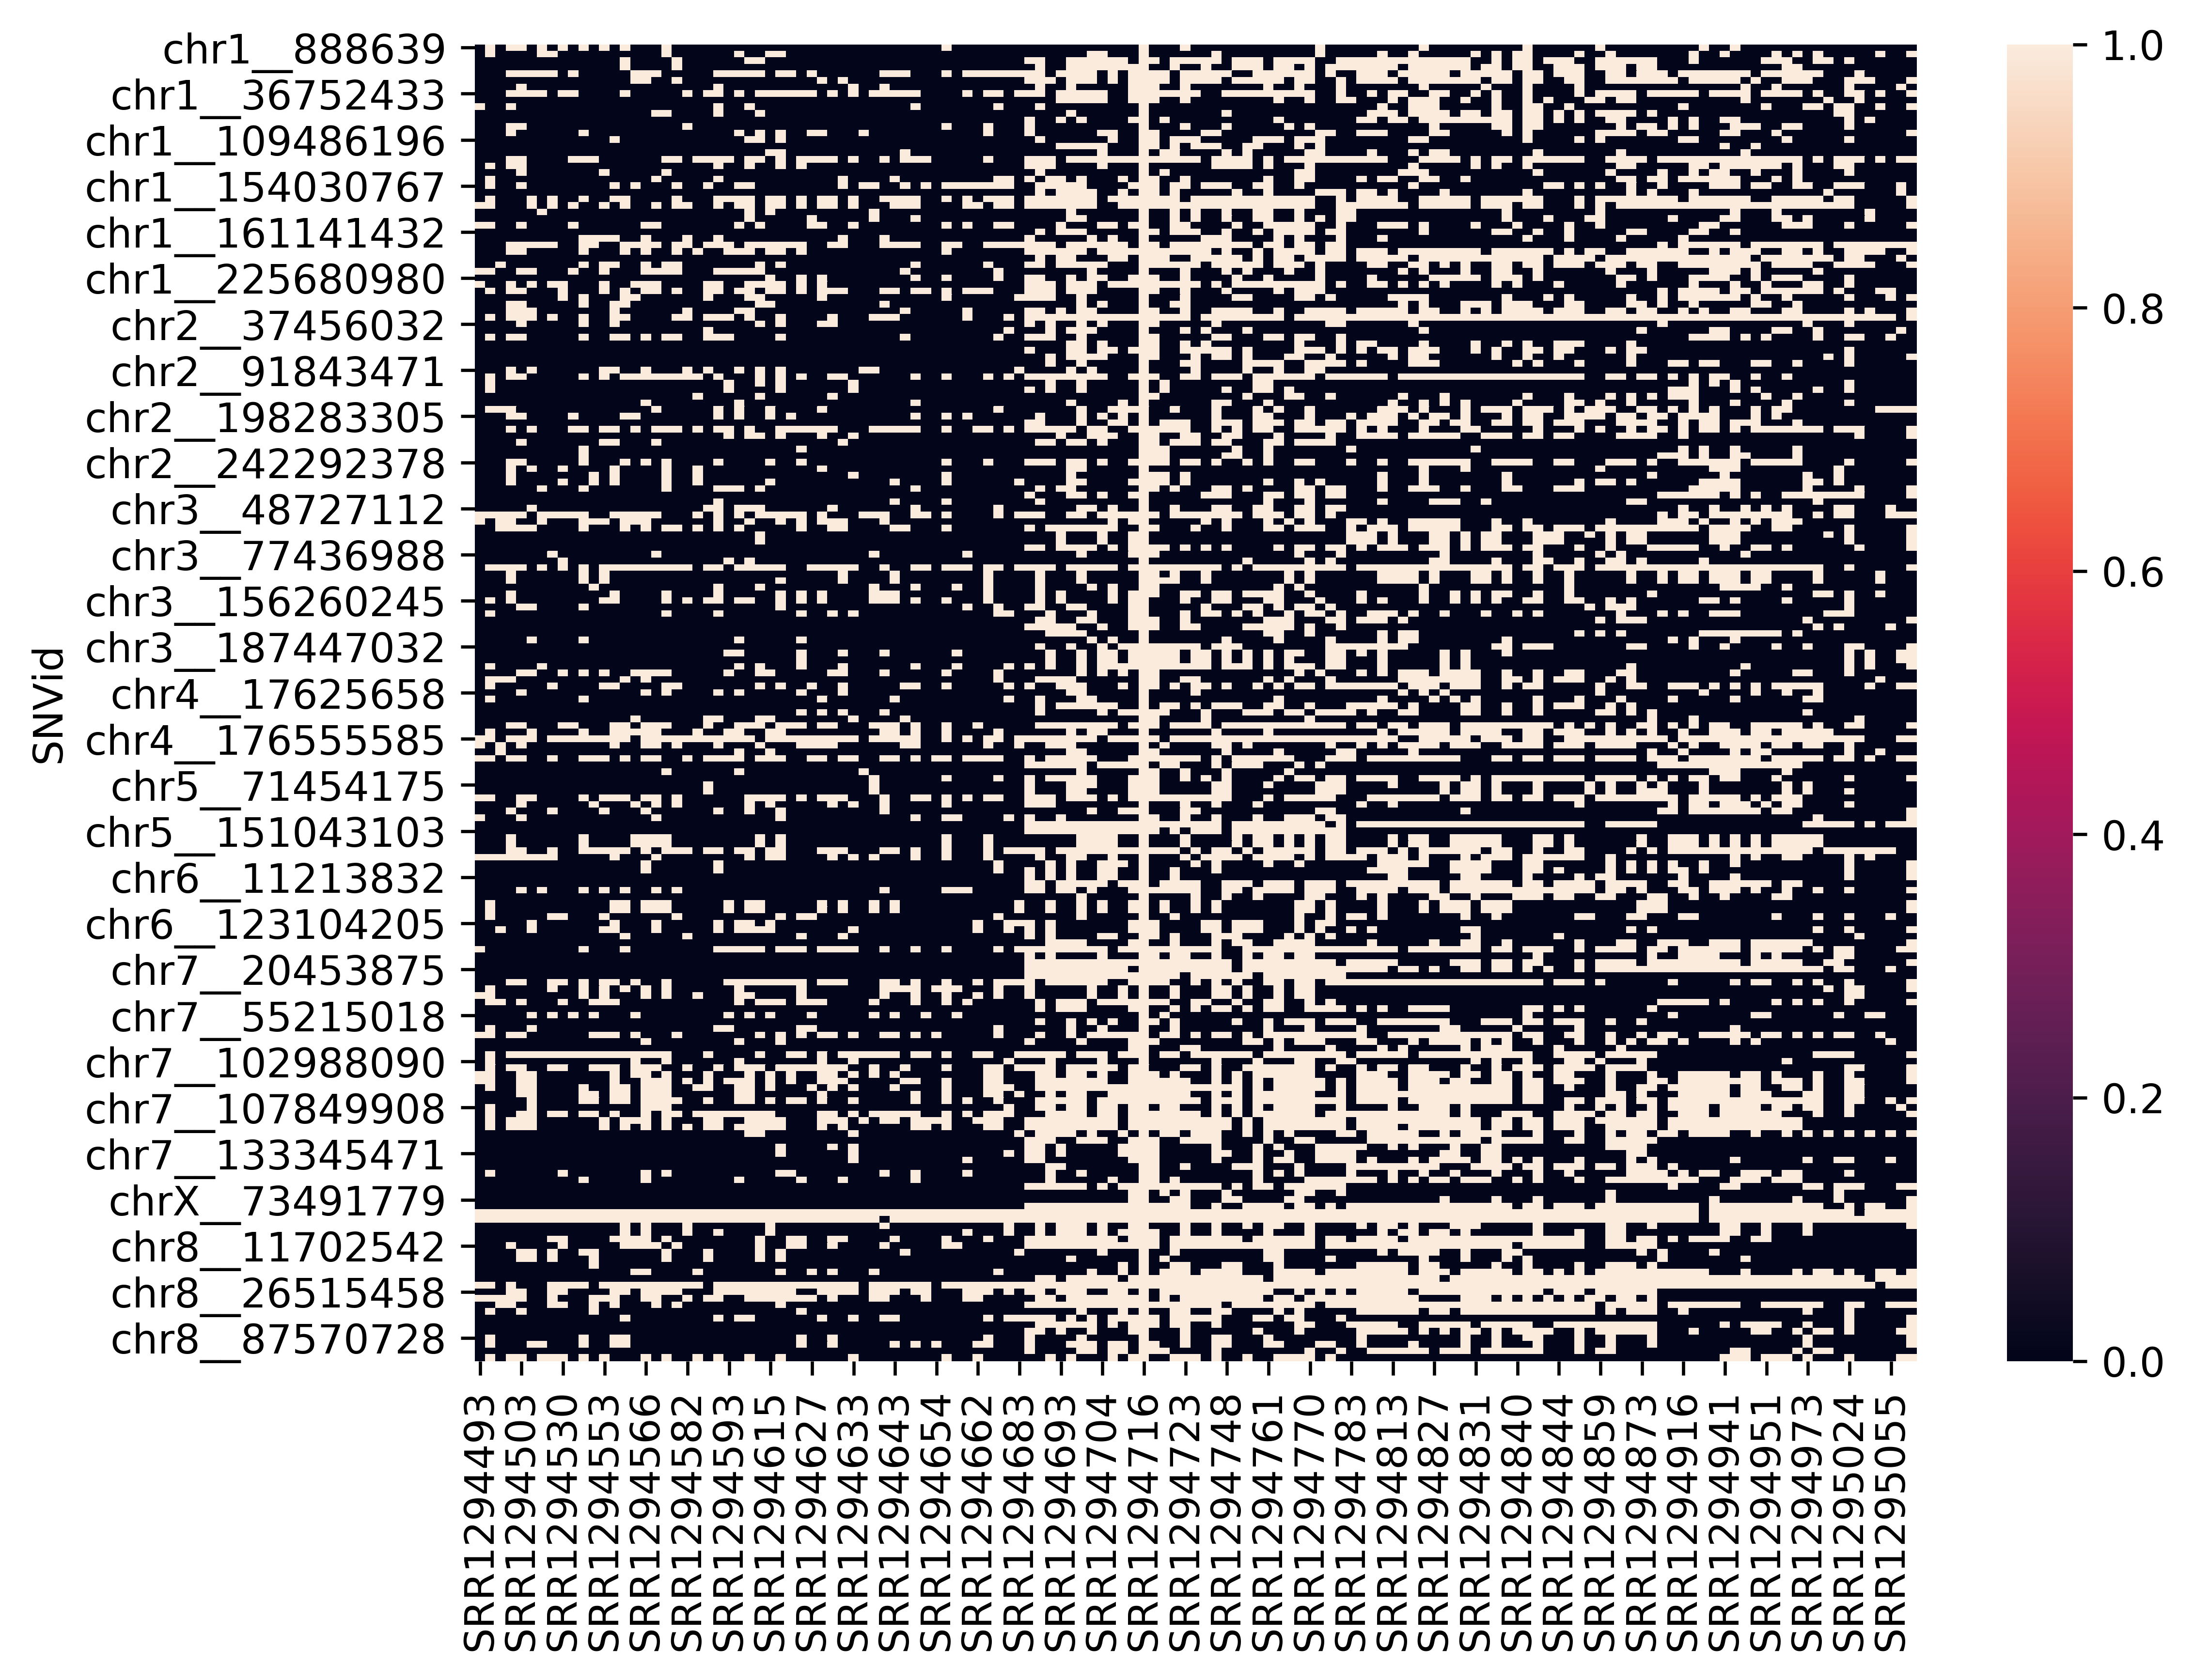

In [327]:
sns.heatmap(snv_Mes_Pro.iloc[:200,])

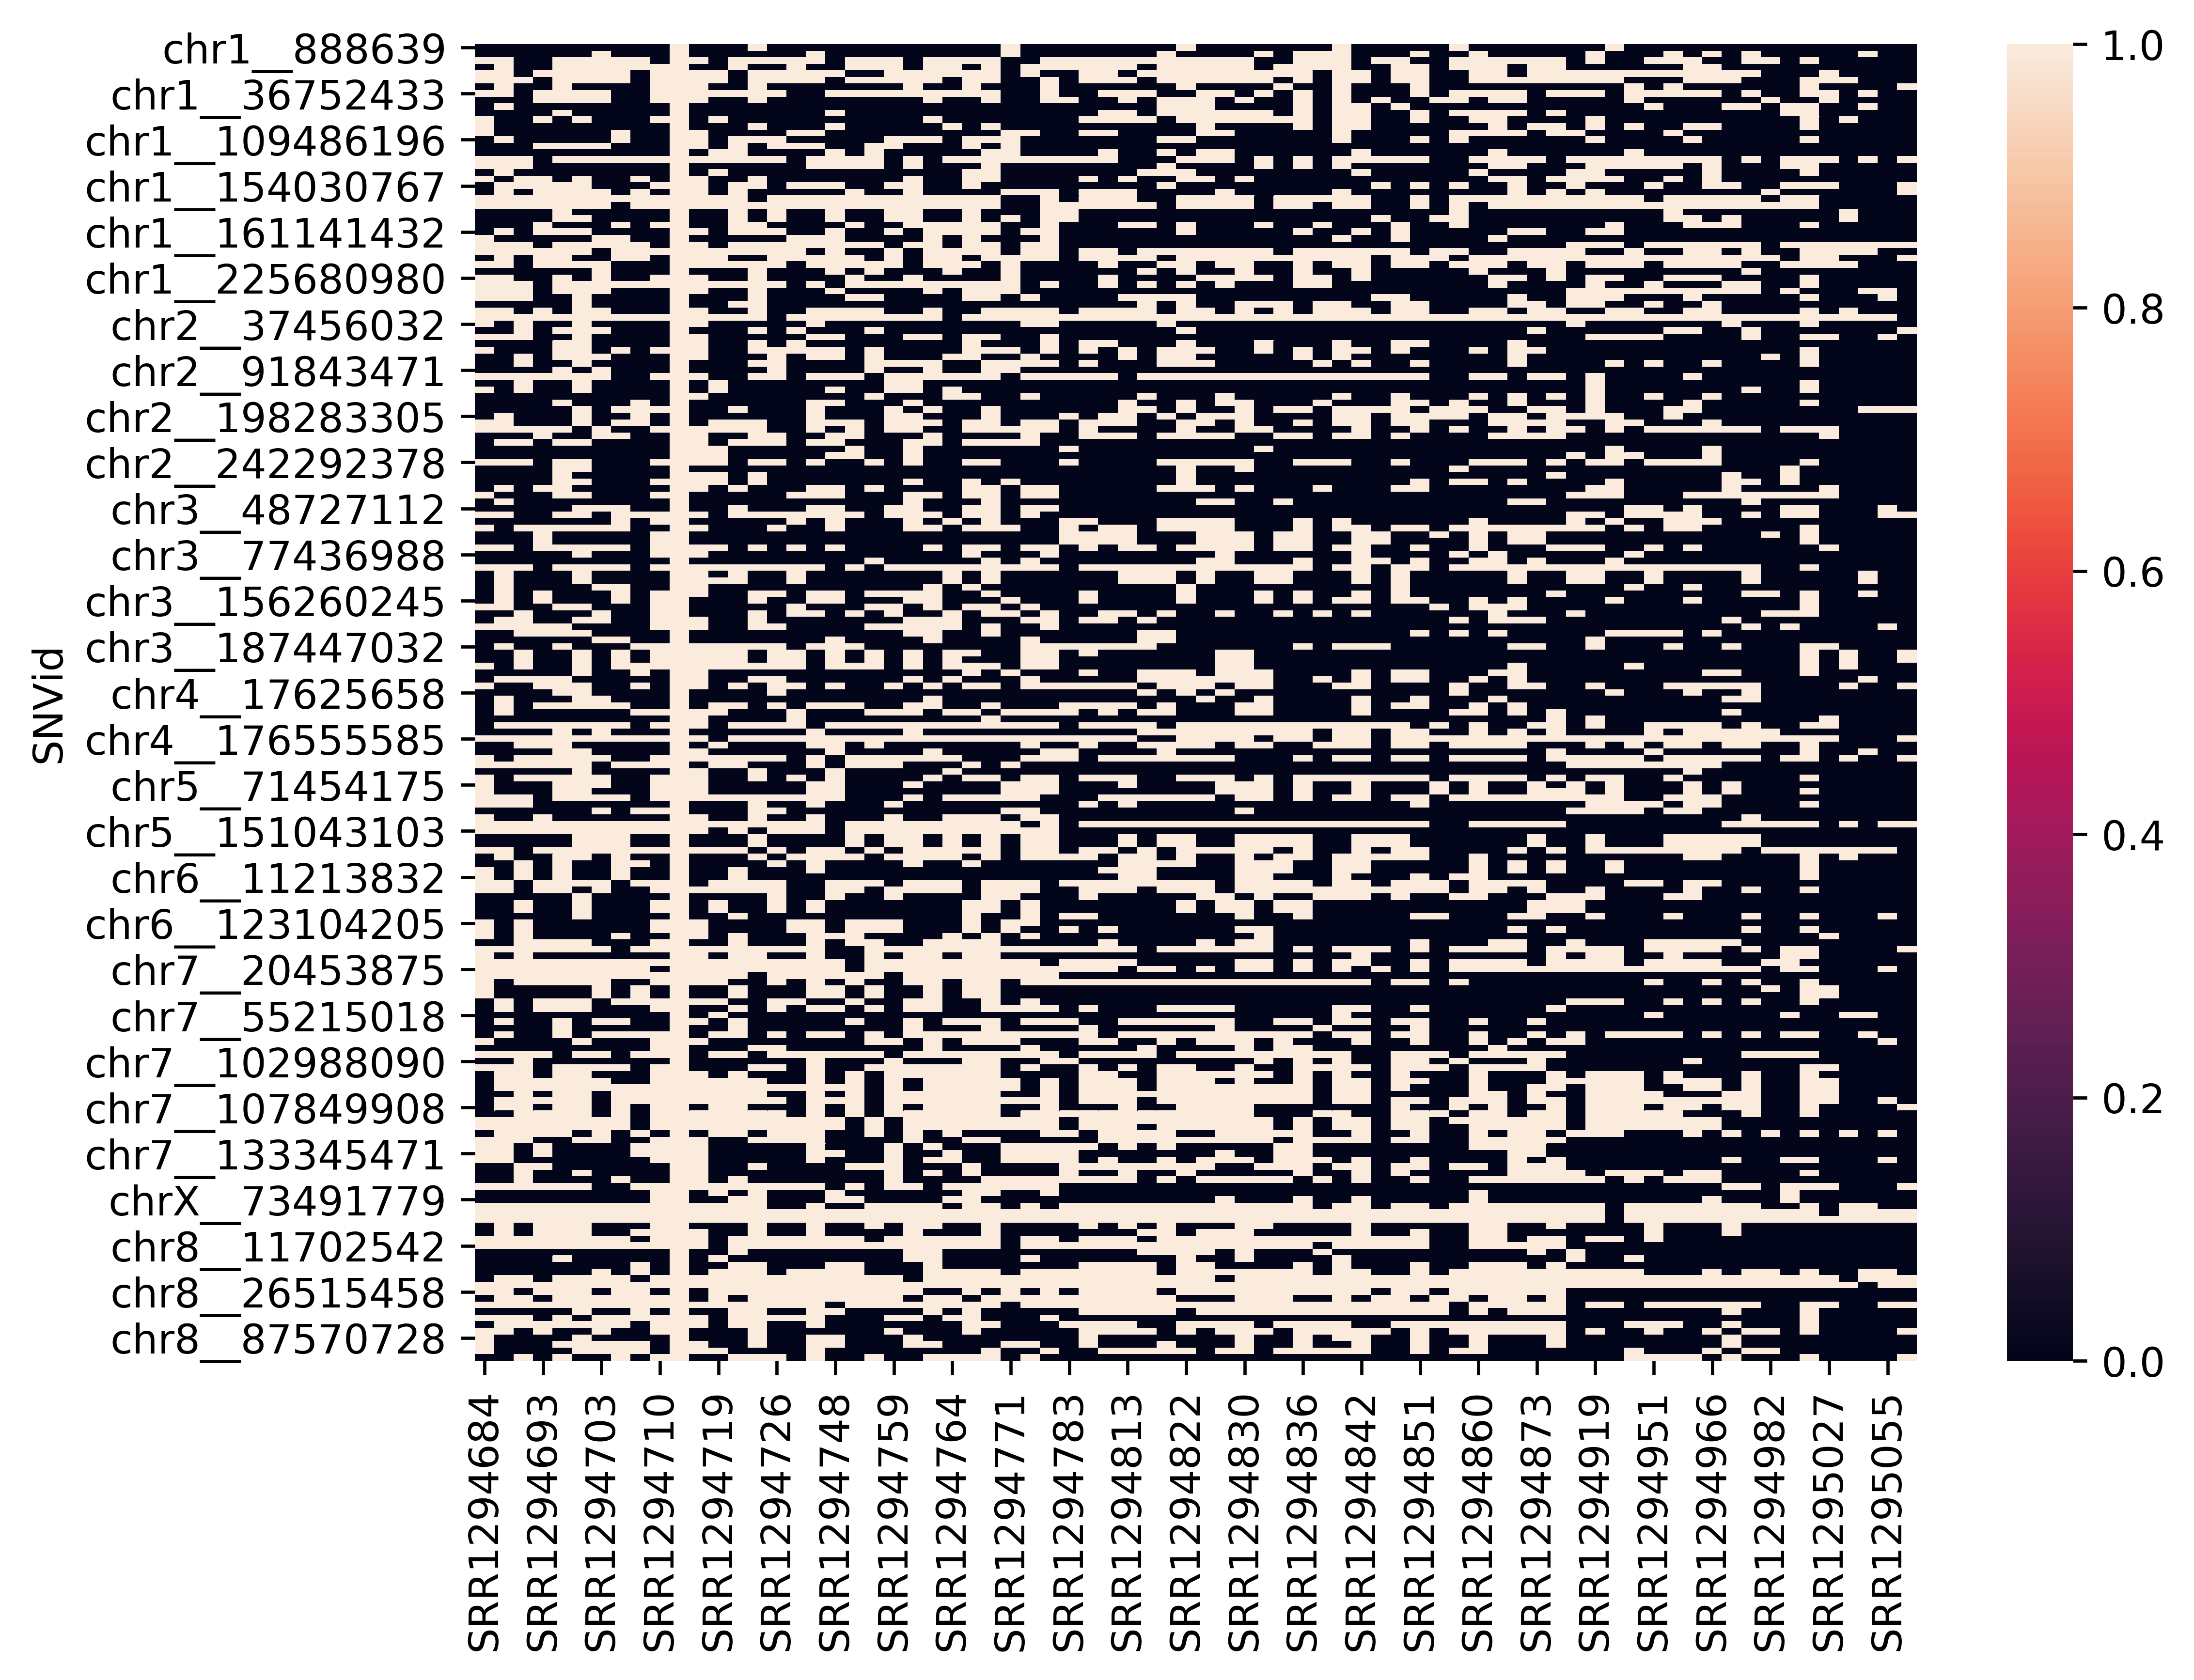

In [328]:
sns.heatmap(snv_Mes.iloc[:200,])

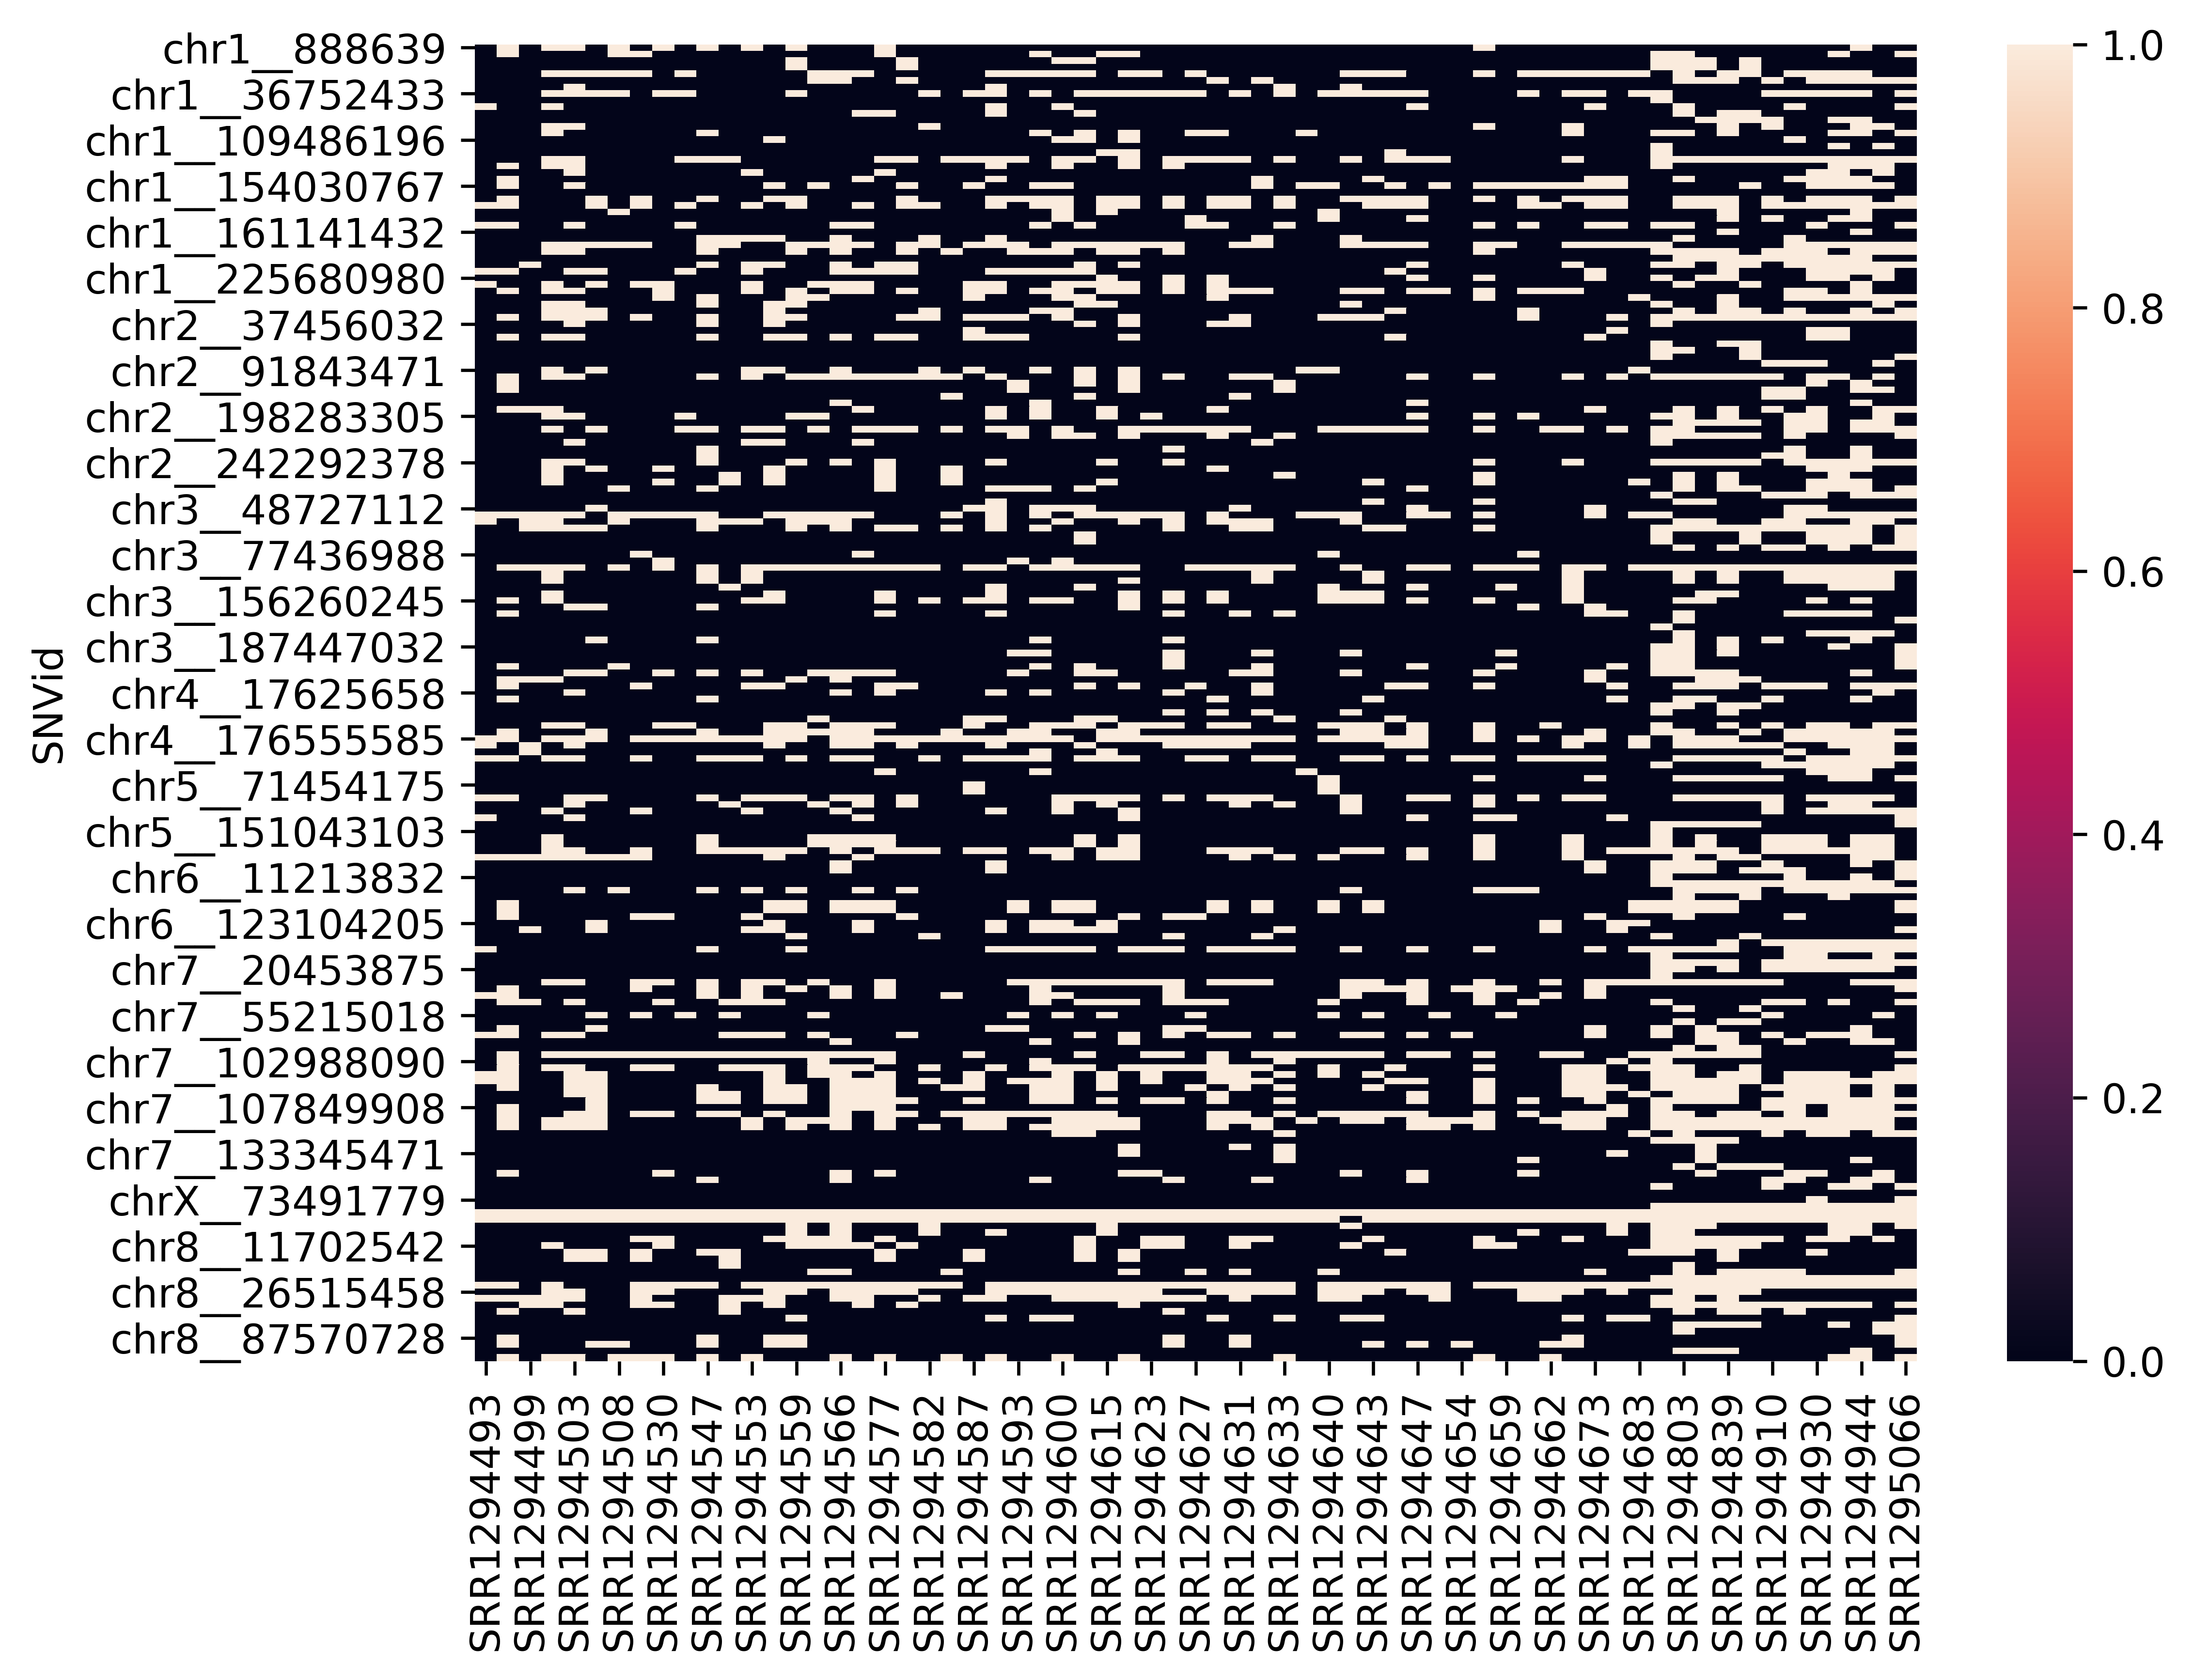

In [329]:
sns.heatmap(snv_Pro.iloc[:200,])

In [371]:
def select_snv(df,threshold = 20):
    # input is a snv matrix, snv*samples
    tmp_df = df.copy(deep=True)
    snv_yes = set((tmp_df == 1).sum(axis=1)[(tmp_df == 1).sum(axis=1) >= threshold].index.values)
    snv_no = set((tmp_df == 0).sum(axis=1)[(tmp_df == 0).sum(axis=1) >= threshold].index.values)
    snv_valid = snv_yes.intersection(snv_no)
    #tmp_df = tmp_df.loc[snv_valid,:]
    return snv_valid

In [372]:
snv_valid_Mes_Pro = select_snv(snv_Mes_Pro)
snv_valid_Mes = select_snv(snv_Mes)
snv_valid_Pro = select_snv(snv_Pro)

In [374]:
len(snv_valid_Mes_Pro)

1569

In [375]:
len(snv_valid_Mes)

702

In [376]:
len(snv_valid_Pro)

354

In [390]:
pvalue_Mes_Pro_filtered = pvalue_Mes_Pro_filtered.loc[:,snv_valid_Mes_Pro]
pvalue_Mes_filtered = pvalue_Mes_filtered.loc[:,snv_valid_Mes]
pvalue_Pro_filtered = pvalue_Pro_filtered.loc[:,snv_valid_Pro]

# Adjust p-value

In [386]:
def df2col(df):
    #df is pvalue dataframe
    row_num = df.shape[0]
    col_num = df.shape[1]
    tmp = 0
    tmp_index_list = []
    for i in range(row_num):
        for j in range(col_num):
            tmp = tmp +1
            k = df.index.values[i] + "____" + df.columns.values[j]
            tmp_index_list.append(k)
    df_one_column = pd.DataFrame({'pvalue':df.values.reshape(-1)})
    df_one_column.index = tmp_index_list
    return df_one_column
    

In [414]:
pvalue_Mes_Pro_col = df2col(pvalue_Mes_Pro_filtered)
pvalue_Mes_col = df2col(pvalue_Mes_filtered)
pvalue_Pro_col = df2col(pvalue_Pro_filtered)
#remove nan value
pvalue_Mes_Pro_col_valid = pvalue_Mes_Pro_col.loc[~pvalue_Mes_Pro_col.isna().pvalue,]
pvalue_Mes_col_valid = pvalue_Mes_col.loc[~pvalue_Mes_col.isna().pvalue,]
pvalue_Pro_col_valid = pvalue_Pro_col.loc[~pvalue_Pro_col.isna().pvalue,]

In [423]:
pvalue_Mes_Pro_adjusted = statsmodels.stats.multitest.multipletests(pvalue_Mes_Pro_col_valid.pvalue.values,alpha=0.05)
pvalue_Mes_adjusted = statsmodels.stats.multitest.multipletests(pvalue_Mes_col_valid.pvalue.values,alpha=0.05)
pvalue_Pro_adjusted = statsmodels.stats.multitest.multipletests(pvalue_Pro_col_valid.pvalue.values,alpha=0.05)

In [442]:
pvalue_Mes_Pro_col_final = pvalue_Mes_Pro_col_valid.copy(deep=True)
pvalue_Mes_Pro_col_final['pvalue_adj'] = pvalue_Mes_Pro_adjusted[1]

pvalue_Mes_col_final = pvalue_Mes_col_valid.copy(deep=True)
pvalue_Mes_col_final['pvalue_adj'] = pvalue_Mes_adjusted[1]

pvalue_Pro_col_final = pvalue_Pro_col_valid.copy(deep=True)
pvalue_Pro_col_final['pvalue_adj'] = pvalue_Pro_adjusted[1]

In [460]:
pair_Mes_Pro = set(pvalue_Mes_Pro_col_final[pvalue_Mes_Pro_col_final['pvalue_adj']<0.01].index.values)
pair_Mes = set(pvalue_Mes_col_final[pvalue_Mes_col_final['pvalue_adj']<0.01].index.values)
pair_Pro = set(pvalue_Pro_col_final[pvalue_Pro_col_final['pvalue_adj']<0.01].index.values)

In [462]:
pair_Mes.intersection(pair_Pro)

{'ENSG00000125730.12____chr3__49396751',
 'ENSG00000137767.9____chr1__182352621',
 'ENSG00000137767.9____chr1__182353198',
 'ENSG00000142347.12____chr15__72637795',
 'ENSG00000173432.6____chr4__91760267',
 'ENSG00000175175.4____chr17__73262293'}

In [448]:
df = pd.DataFrame({'gene':gene_Mes_Pro.loc['ENSG00000162493.12',],'snv':snv_Mes_Pro.loc['chr1__13940864',]})

In [449]:
df

gene  snv
SRR1294493     0    0
SRR1294498     0    0
SRR1294499    14    0
SRR1294500     0    0
SRR1294503    26    0
...          ...  ...
SRR1295039   327    0
SRR1295040    14    0
SRR1295055   349    0
SRR1295056   218    0
SRR1295066   239    0

[139 rows x 2 columns]

In [450]:
df.loc[df.gene>0,]

gene  snv
SRR1294499    14    0
SRR1294503    26    0
SRR1294508    10    0
SRR1294559   363    1
SRR1294580   382    1
...          ...  ...
SRR1295039   327    0
SRR1295040    14    0
SRR1295055   349    0
SRR1295056   218    0
SRR1295066   239    0

[90 rows x 2 columns]

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


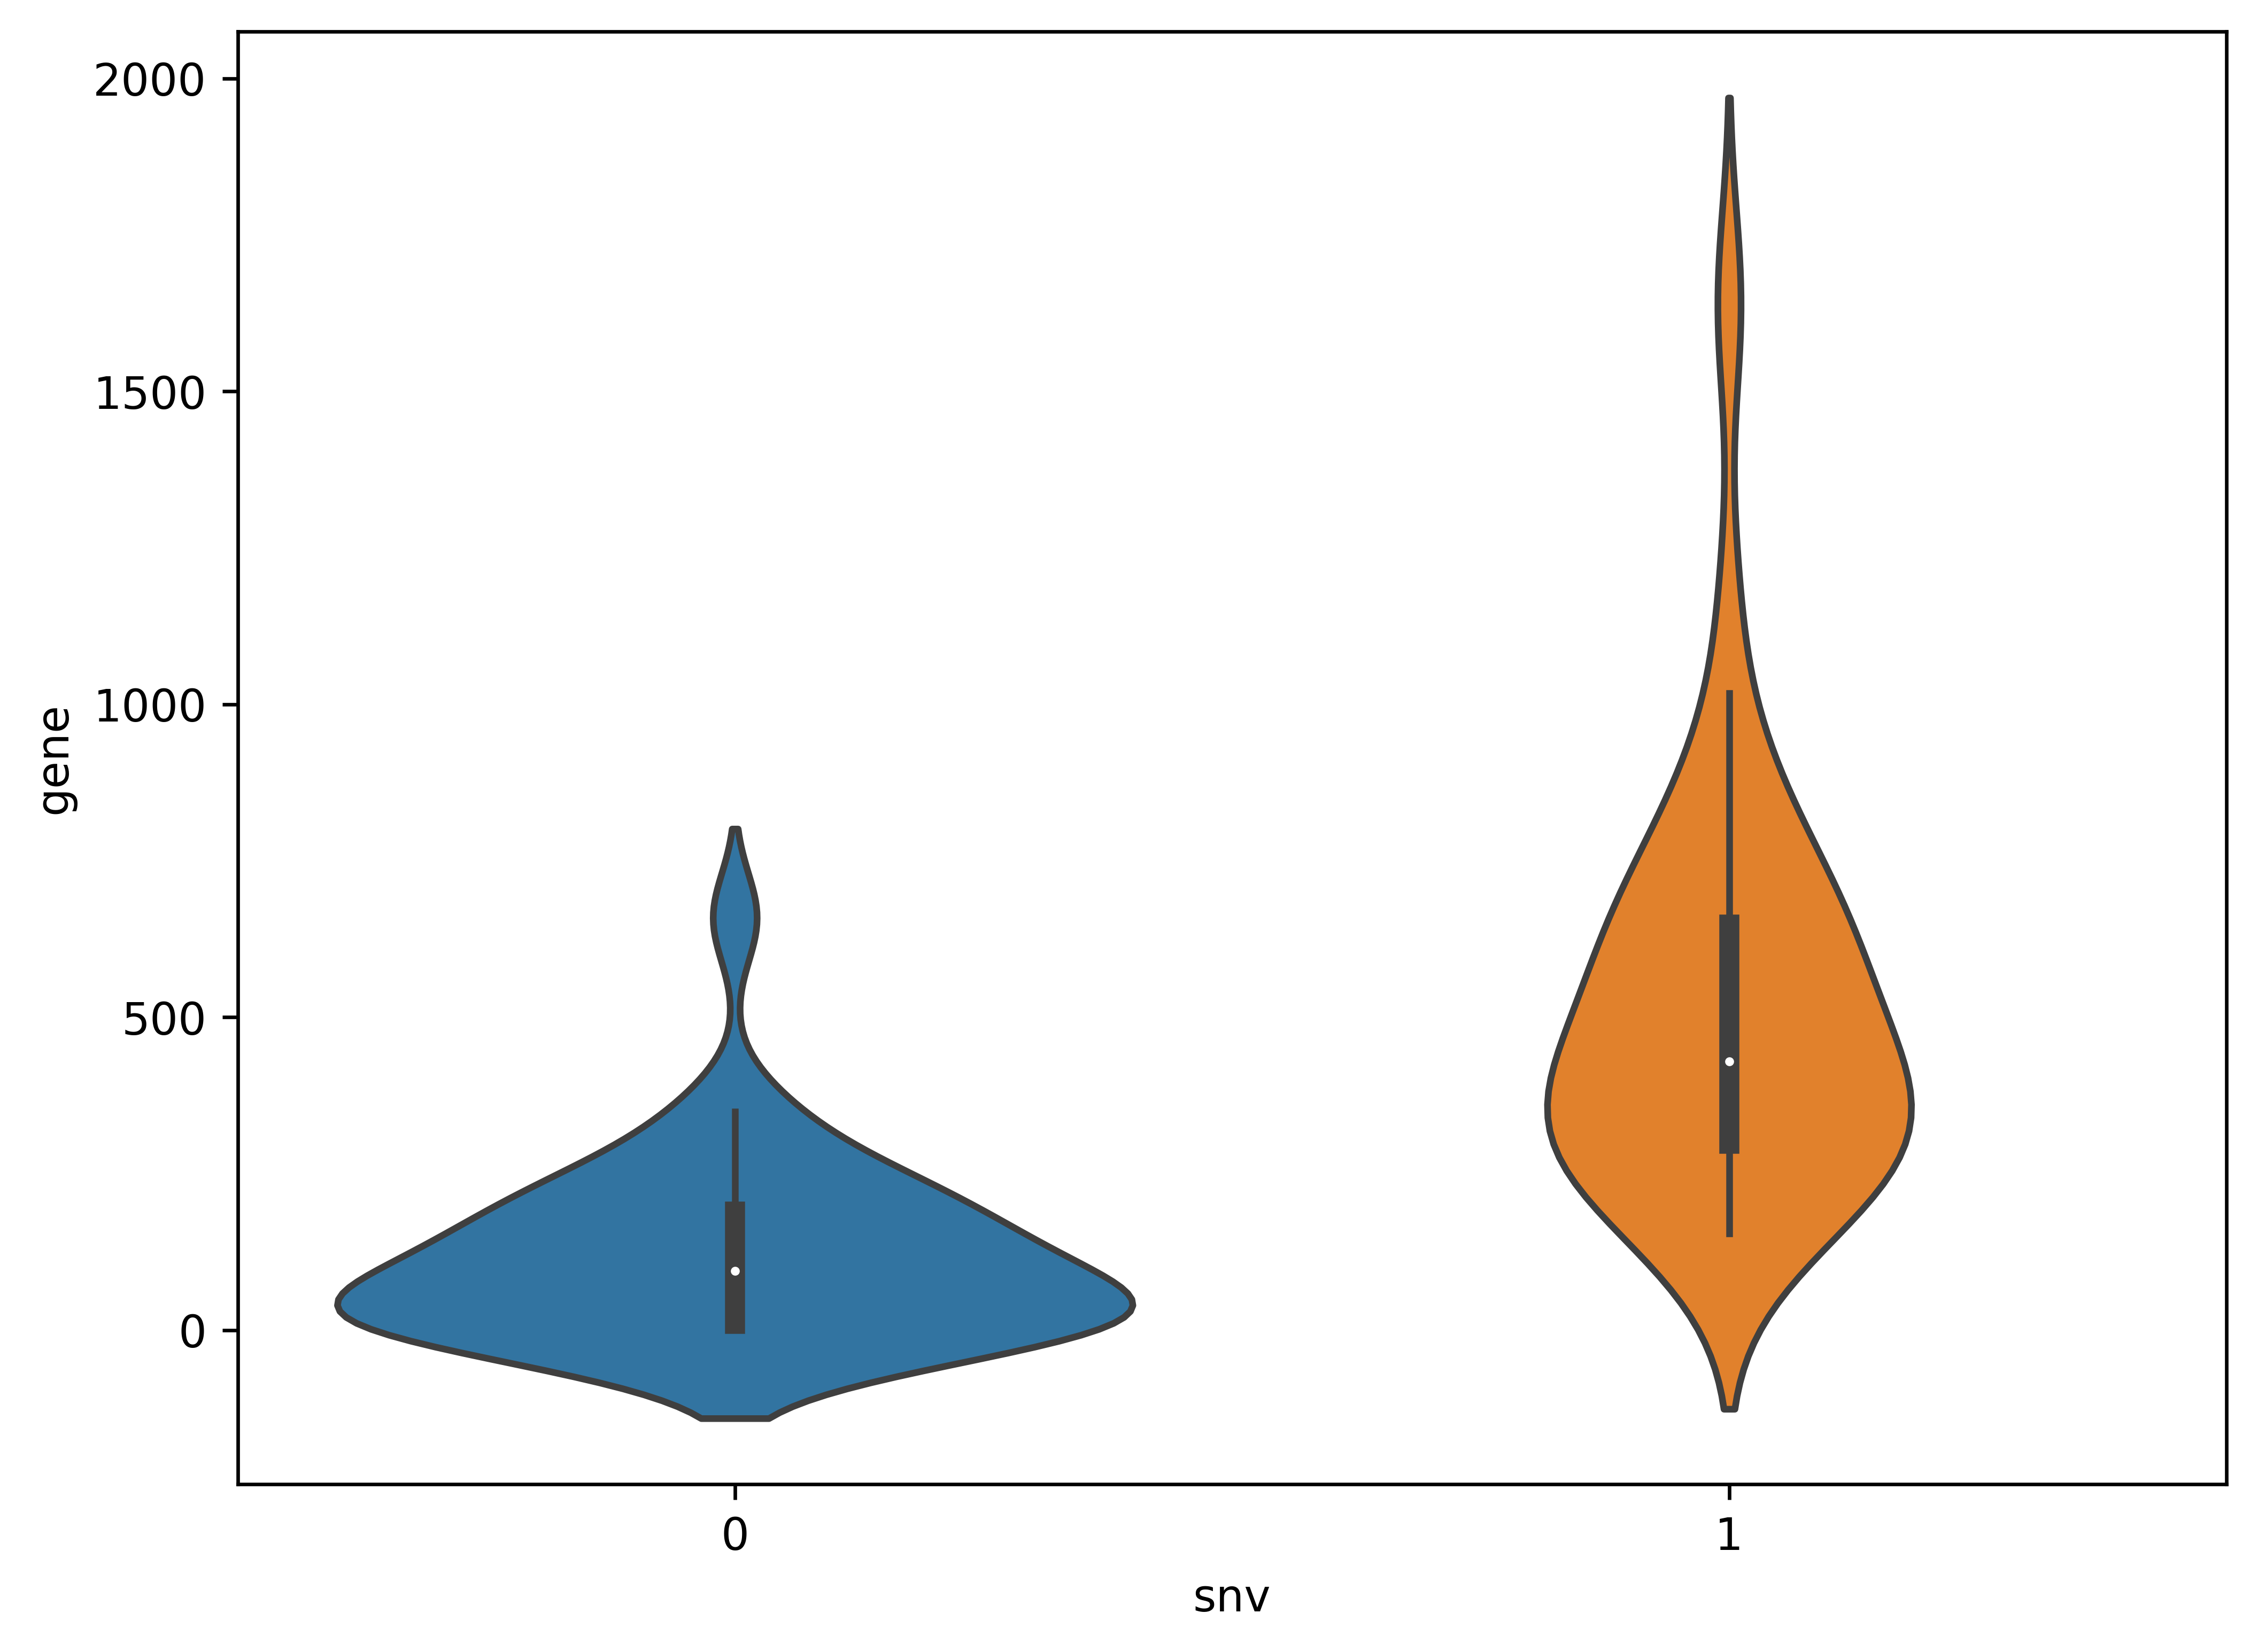

In [452]:
sns.violinplot(x="snv", y="gene", data=df.loc[df.gene>0,])

In [259]:
pvalue_subtype

chr1__888639  chr1__1247494  chr1__13940864  \
ENSG00000074800.9       0.064170   2.153317e-07    5.371757e-04   
ENSG00000162493.12      0.855269   7.826621e-01    1.590520e-23   
ENSG00000127472.6       0.343320   8.039122e-01    1.009307e-01   
ENSG00000070831.11      0.908261   4.198816e-01    6.910427e-01   
ENSG00000117632.16      0.435825   9.201707e-01    5.640577e-04   
...                          ...            ...             ...   
ENSG00000165704.10      0.652670   7.051378e-01    5.018397e-01   
ENSG00000029993.10      0.971319   1.061314e-01    1.336702e-02   
ENSG00000011677.8       0.738851   6.650620e-01    6.675582e-01   
ENSG00000172534.9       0.630320   7.229332e-01    4.602524e-01   
ENSG00000196924.10      0.517961   6.722847e-01    7.154443e-01   

                    chr1__13942731  chr1__20982631  chr1__25168124  \
ENSG00000074800.9     3.265062e-28   3.708607e-139    1.751745e-62   
ENSG00000162493.12    7.707147e-07    6.447327e-01    3.851155e-02   
ENSG00000127472.6     1.569816e-01    4.766931e-01    5.689346e-01   
ENSG00000070831.11    3.134956e-01    7.367480e-01    7.894745e-02   
ENSG00000117632.16    3.473060e-02    7.348314e-01    5.020423e-05   
...                            ...             ...             ...   
ENSG00000165704.10    2.497017e-01    4.170113e-01    1.171465e-01   
ENSG00000029993.10    2.069811e-01    8.860101e-01    4.126923e-02   
ENSG00000011677.8     6.028191e-01    4.497799e-01    5.186247e-01   
ENSG00000172534.9     9.238602e-03    3.540423e-01    1.079749e-01   
ENSG00000196924.10    2.191376e-02    3.085821e-01    9.898212e-04   

                    chr1__36690047  chr1__36752433  chr1__52290984  \
ENSG00000074800.9    5.400628e-124    3.893577e-53    1.647440e-91   
ENSG00000162493.12    8.390503e-01    6.662366e-01    1.436799e-01   
ENSG00000127472.6     9.852766e-01    5.272768e-01    8.243073e-01   
ENSG00000070831.11    8.407091e-01    1.819063e-01    9.851655e-01   
ENSG00000117632.16    1.063621e-01    6.875947e-01    1.902433e-02   
...                            ...             ...             ...   
ENSG00000165704.10    7.847232e-01    1.018565e-01    2.485074e-01   
ENSG00000029993.10    5.941487e-01    6.293277e-01    4.516915e-02   
ENSG00000011677.8     8.139229e-01    2.008338e-01    7.020088e-01   
ENSG00000172534.9     7.785594e-01    9.067585e-01    8.473074e-01   
ENSG00000196924.10    4.596517e-07    5.996548e-01    8.311735e-01   

                    chr1__93308798  ...  chr6__25343823  chr6__25344086  \
ENSG00000074800.9     9.776884e-07  ...    1.448331e-71   1.590980e-117   
ENSG00000162493.12    7.119298e-01  ...    8.641546e-01    9.875064e-01   
ENSG00000127472.6     1.013545e-01  ...    8.258830e-01    8.531897e-01   
ENSG00000070831.11    8.290720e-01  ...    9.143103e-01    4.713662e-01   
ENSG00000117632.16    5.712448e-01  ...    4.189323e-01    4.676648e-01   
...                            ...  ...             ...             ...   
ENSG00000165704.10    3.065235e-01  ...    7.329462e-01    3.154501e-01   
ENSG00000029993.10    1.466158e-01  ...    9.559449e-01    9.353458e-01   
ENSG00000011677.8     1.229939e-02  ...    1.034691e-01    2.978318e-03   
ENSG00000172534.9     8.284438e-01  ...    1.858532e-01    1.160367e-03   
ENSG00000196924.10    1.925117e-02  ...    7.417517e-01    2.365172e-01   

                    chr11__85698207  chr7__55250026  chr20__330408  \
ENSG00000074800.9      4.712865e-67   2.694961e-138  6.677629e-141   
ENSG00000162493.12     2.284934e-01    1.440314e-02   4.224487e-01   
ENSG00000127472.6      3.253893e-01    1.794161e-02   4.650893e-01   
ENSG00000070831.11     2.394156e-01    5.790972e-01   7.134431e-02   
ENSG00000117632.16     1.435060e-03    6.901579e-01   7.896800e-01   
...                             ...             ...            ...   
ENSG00000165704.10     8.198909e-01    4.643544e-01   9.063450e-01   
ENSG00000029993.10     3.006602e-06    1.044867e-01   3.797169e-01   
EN